# Decision Trees

### Example animal decision tree

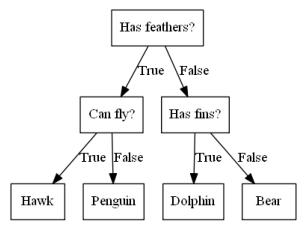

In [30]:
import sklearn
import mglearn
mglearn.plots.plot_animal_tree()


### Loading the breast cancer dataset

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

### Building the decision tree model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


### Controlling complexity of Decision Trees
#### Set the max_depth parameter to 4 to limit the trees growth

In [33]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Analyzing and Visualizing Decision Trees

In [34]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

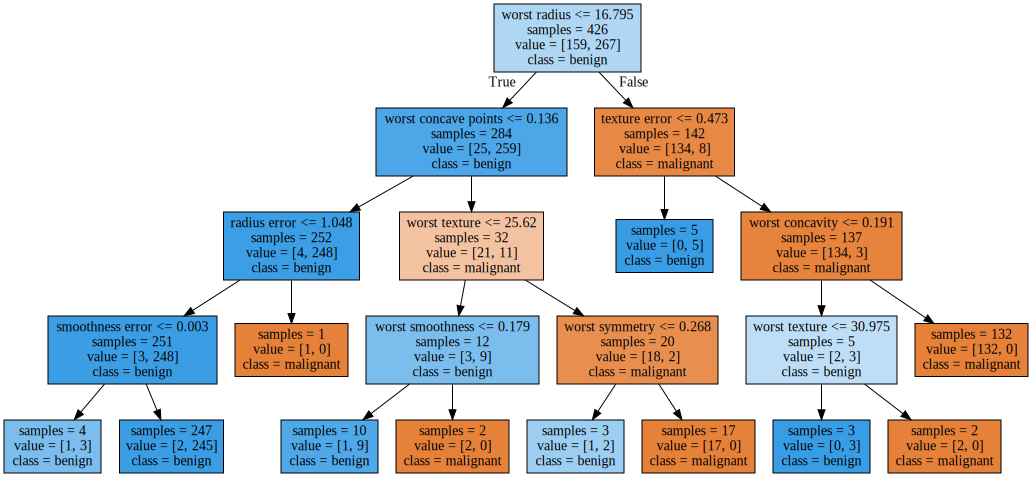

In [35]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Resize the decision tree to fit the screen

In [36]:
import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)

pydot_graph.set_size('"10,6"')

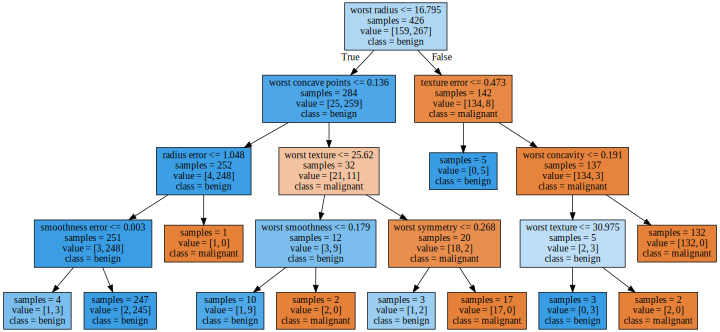

In [37]:
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### Analyzing Feature Importance in Trees

In [38]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


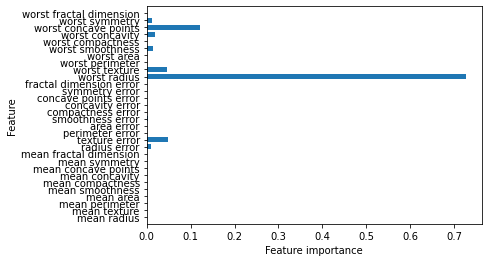

In [39]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

##### The graph above shows that "worst radius" is the most important feature in splitting the decision tree

Feature importances: [0. 1.]


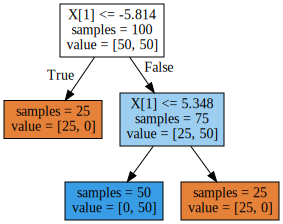

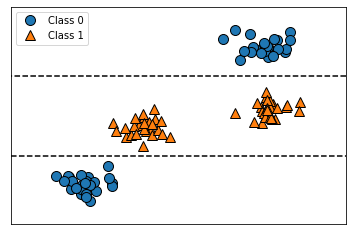

In [40]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Discuss the differences and similarities between DT models and kNN models:
> Similarities:
> * Supervised learning models
> * Only a few hyperparameters need to be adjusted
> * Can be used for classification or regression


> Differences:
> * DTs are easier to explain and more readily accepted by end users because they can be shown visually
> * kNN models can be influenced by outliers in the data more than DTs
> * DTs tend to overfit data with default model settings in place since they continue until pure leaves

### BONUS - post pruning decision trees with cost complexity pruning

#### Loading the data

In [41]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#### Build the tree

In [42]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


#### The number of nodes in the tree and the tree depth decreases as alpha increases.

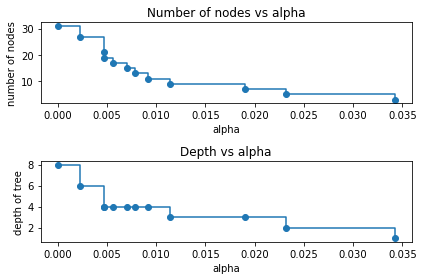

In [43]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs Alpha

When ccp_alpha is zero the tree overfits. So while training accuracy is 100%, the test accuracy is only 88%. 

To make a decision tree that generalizes to unknown data better, we need to increase the ccp_alpha so that the tree is pruned more. A ccp_alpha of 0.015 produces the maximum test score of: 93.7%. This was determined using the max(test_scores) function after the cell below as run.

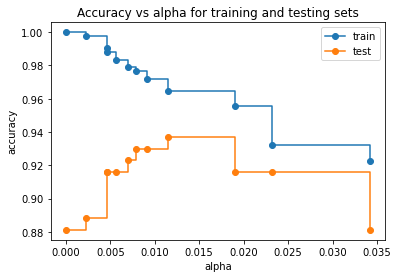

In [44]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [45]:
print("Maximum test accuracy: {:.3f}".format(max(test_scores)))

Maximum test accuracy: 0.937
